# Instructions
* An Excel sheet is provided to download the data given against it.
Work with the data.
* while submitting, submit the .ipynb file directly. ***no need to convert to pdf***
* Select the Data set, Processing specific row ranges according to your Roll number's last Digit

***Roll No (Even): Flocculant data*** 

***Roll No (ODD): RO data***

* Rename the file to your roll number.ipynb (eg:111101001.ipynb)


# SECTION 1
* Import all required
* Make sure that all the import statements are written in the below python cell

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE

# SECTION 2:
* Import the dataset given to you and name it with your name.
* Example: your name: john
  Name of dataframe : john_df

In [5]:
anuj_df=pd.read_excel('Ro_data.xlsx')

# SECTION 3
 Preprocessing
* Remove duplicates if they are present
* Fill null values with the mean(Roll no: ODD)/median (Roll no: Even) if any are found
  
  ***Feature scaling:***
* Min-Max Scaling (Normalization) Roll No: ODD
* Standardization (Z-Score Normalization) Roll No: Even

  ***Correlation Heatmap***
 * Drop the columns based on the heat map if required 

In [6]:
anuj_df.drop_duplicates(inplace=True)


In [7]:
anuj_df.isnull().sum()

t          0
TDS_p      0
F_tot      0
F_p        0
V_rej      0
Rec_tot    4
Rec_mem    0
TDS_rej    0
TDS_mem    0
F_mem      0
dtype: int64

In [8]:
anuj_df.fillna(anuj_df.mean(), inplace=True)

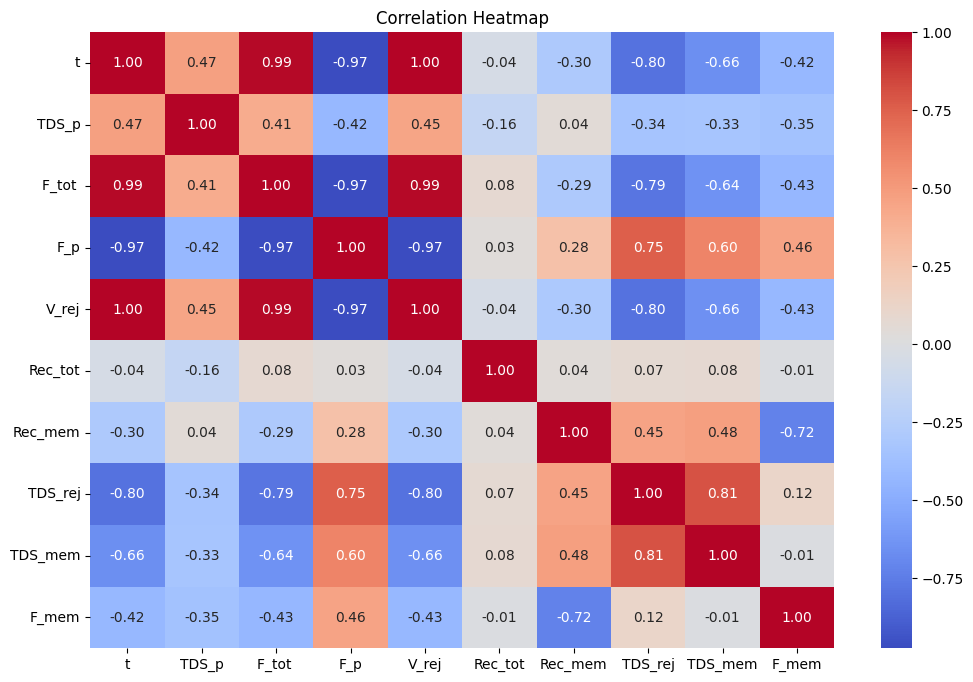

In [10]:

correlation_matrix = anuj_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()


In [15]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming anuj_df is already loaded
# Convert all columns that can be converted to numeric values
anuj_df[anuj_df.select_dtypes(include=[object]).columns] = anuj_df.select_dtypes(include=[object]).apply(pd.to_numeric, errors='coerce')

# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Apply Min-Max Scaling on the numeric columns
normalized_data = scaler.fit_transform(anuj_df.select_dtypes(include=['float64', 'int64']))

# Create a DataFrame with the normalized data
normalized_df = pd.DataFrame(normalized_data, columns=anuj_df.select_dtypes(include=['float64', 'int64']).columns)

# Select non-numeric columns to keep them in the final DataFrame
non_numeric_df = anuj_df.select_dtypes(exclude=['float64', 'int64'])

# Combine normalized numeric DataFrame with non-numeric DataFrame
final_df = pd.concat([non_numeric_df.reset_index(drop=True), normalized_df.reset_index(drop=True)], axis=1)

# Save the normalized DataFrame to an Excel file
final_df.to_excel('normalized_anuj_df.xlsx', index=False)  # Change to .xlsx

# Print the first few rows of the final DataFrame
print(final_df.head())


          t  TDS_p    F_tot        F_p     V_rej   Rec_tot   Rec_mem  \
0  0.000000   0.55  0.000000  0.908186  0.000000  0.950869  0.647492   
1  0.002145   0.35  0.002020  0.929704  0.003417  0.910318  0.656115   
2  0.002145   0.35  0.002020  1.000000  0.003417  0.910318  0.683064   
3  0.004826   0.35  0.005049  0.985529  0.006834  0.925304  0.677664   
4  0.006971   0.35  0.007069  0.946166  0.009397  0.925304  0.662590   

    TDS_rej   TDS_mem     F_mem  
0  0.468971  0.291568  0.644444  
1  0.347211  0.230890  0.644444  
2  0.347211  0.226162  0.644444  
3  0.472113  0.262411  0.644444  
4  0.431265  0.265563  0.644444  


In [ ]:
# nothing to remove from heatmap

# SECTION 4: (Perform outlier removal, feature selection (using L1) and apply Principal Component Analysis (PCA)), LDA, t-SNE
 ***Outlier removal***
 * Z-Score Method (Standardization) Roll No: Even
 * Interquartile Range (IQR) Method Roll No: ODD
 
 ***Feature Extraction***
* Perform PCA with 10 components.
* Print all necessary for PCA results.
* Plot new PC1 to PC10
* Generate a Scree Plot for PCA, LDA.
* Scatter plot for t-SNE

In [20]:
iqr_multiplier = 1.5

numeric_columns = anuj_df.select_dtypes(include=['number']).columns

Q1 = anuj_df[numeric_columns].quantile(0.25)
Q3 = anuj_df[numeric_columns].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - (iqr_multiplier * IQR)
upper_bound = Q3 + (iqr_multiplier * IQR)

outlier_mask = ((anuj_df[numeric_columns] < lower_bound) | (anuj_df[numeric_columns] > upper_bound)).any(axis=1)
anuj_df_cleaned = anuj_df[~outlier_mask]

print(f"Original Data Shape: {anuj_df.shape}")
print(f"Cleaned Data Shape: {anuj_df_cleaned.shape}")
print(f"Number of Outliers Removed: {anuj_df.shape[0] - anuj_df_cleaned.shape[0]}")

Original Data Shape: (550, 10)
Cleaned Data Shape: (493, 10)
Number of Outliers Removed: 57


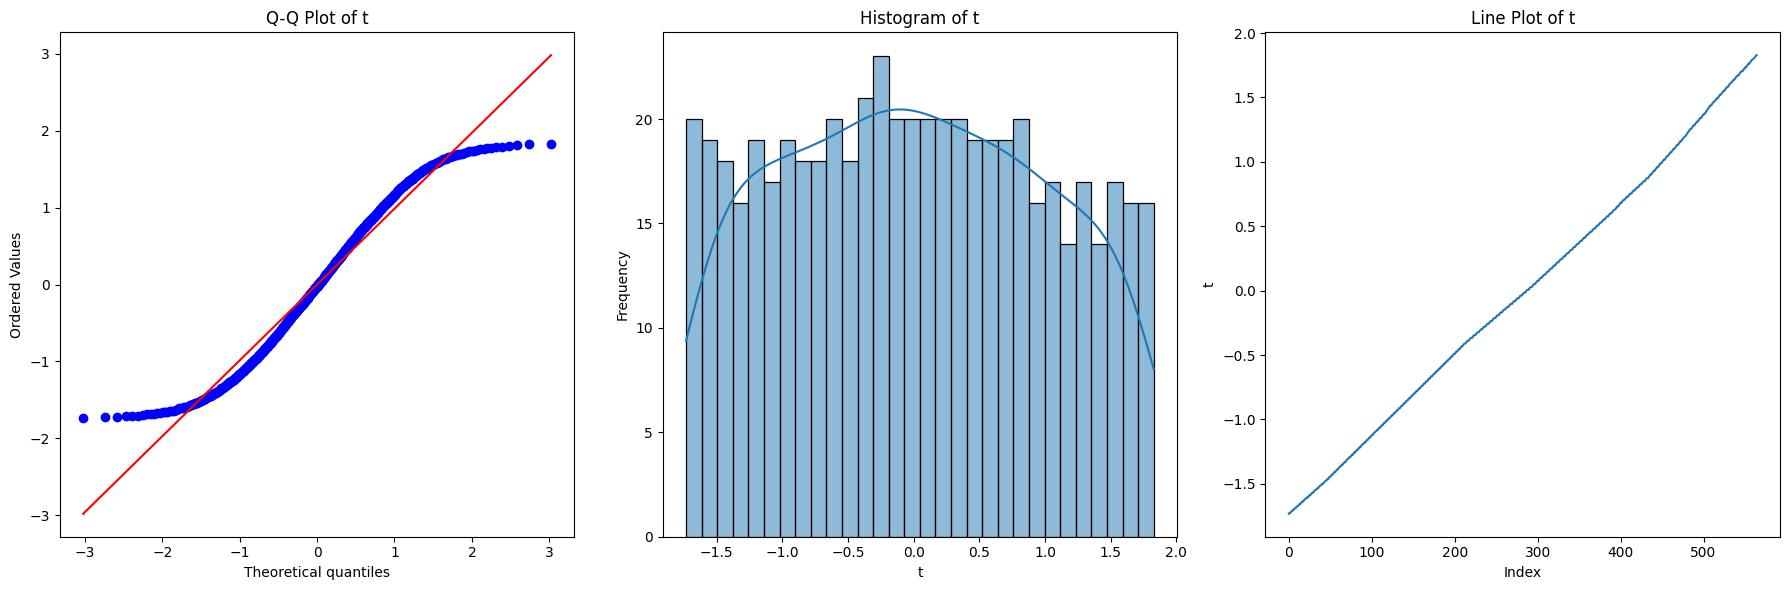

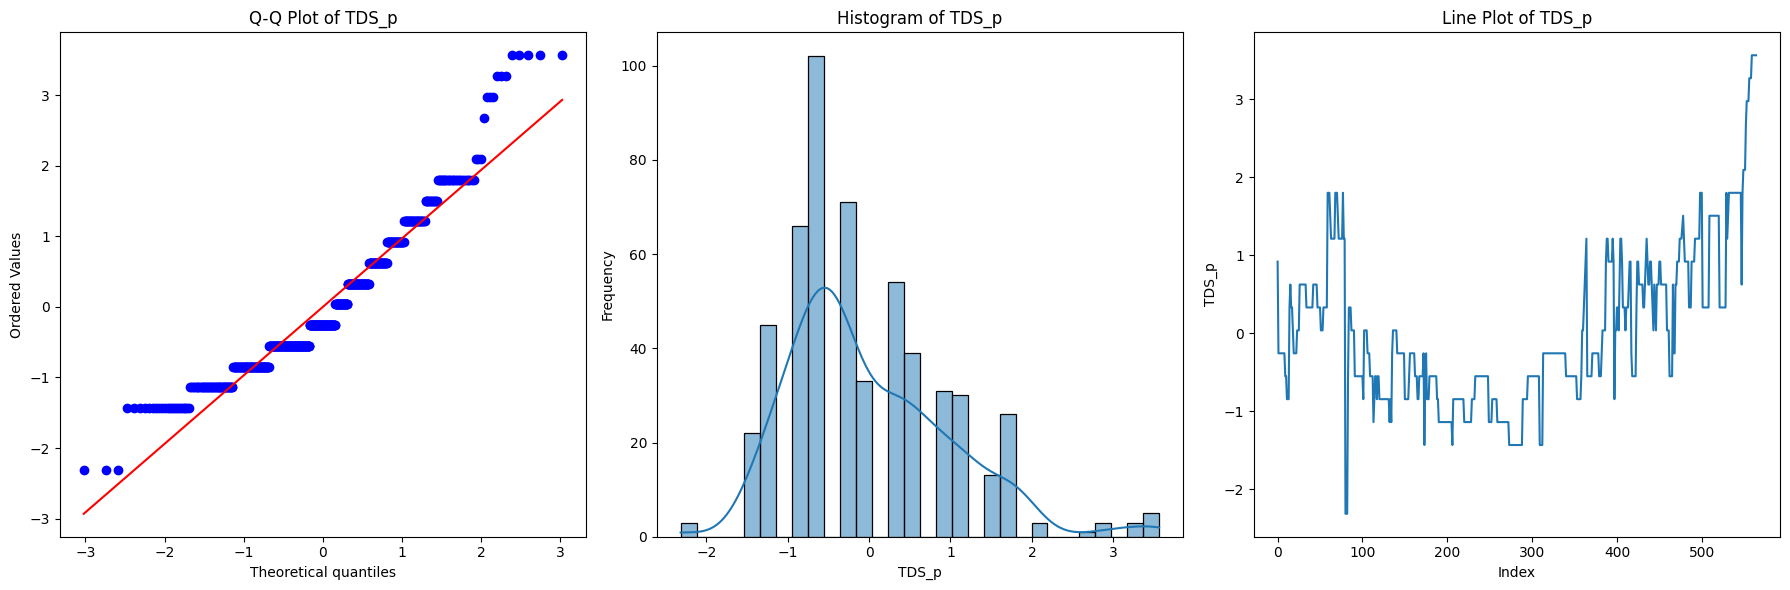

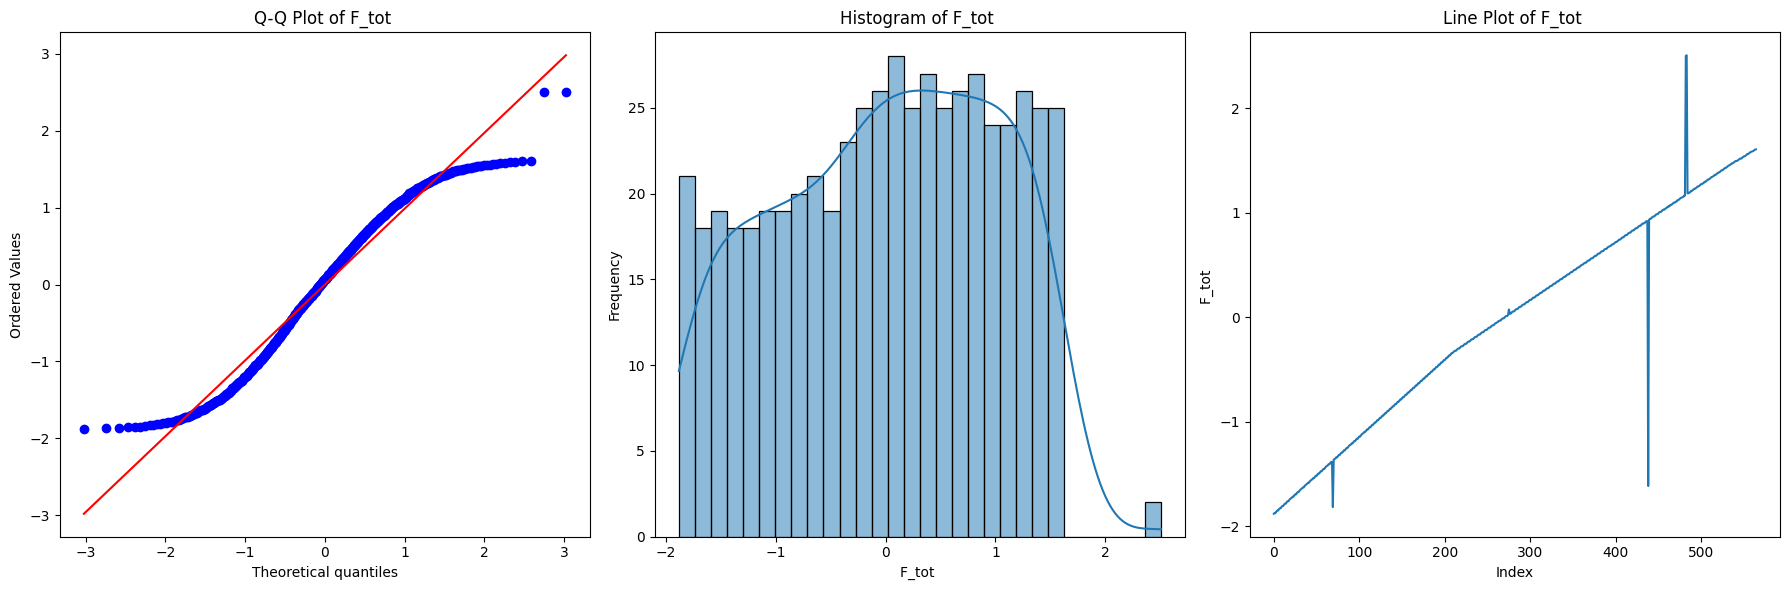

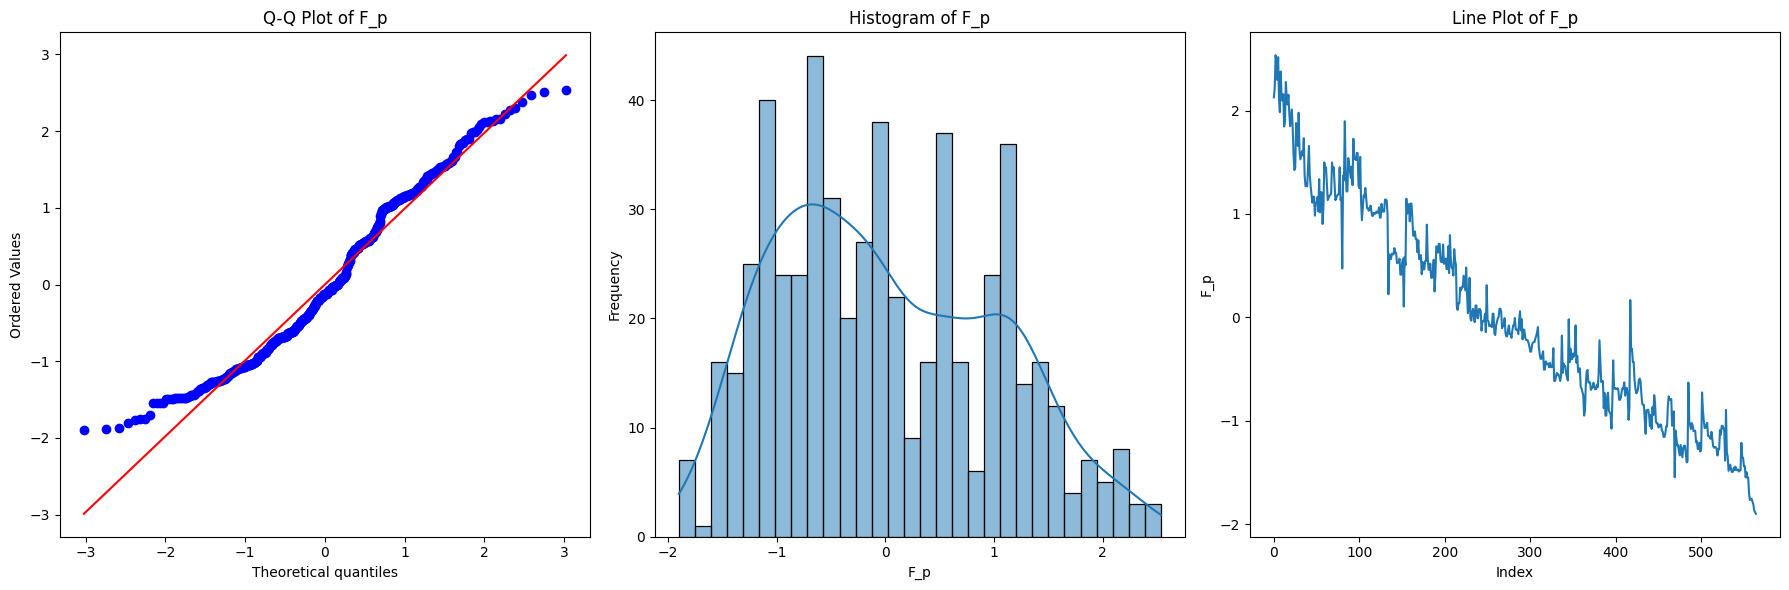

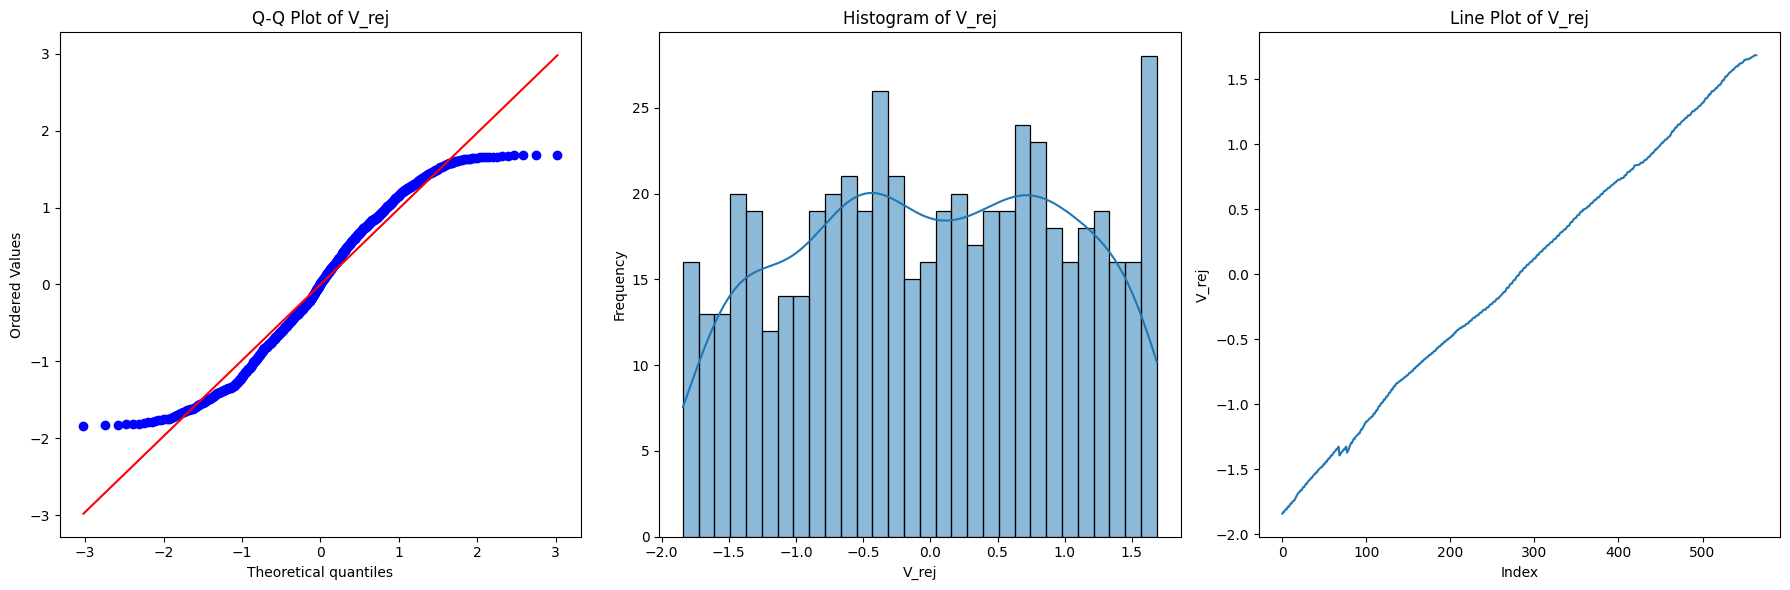

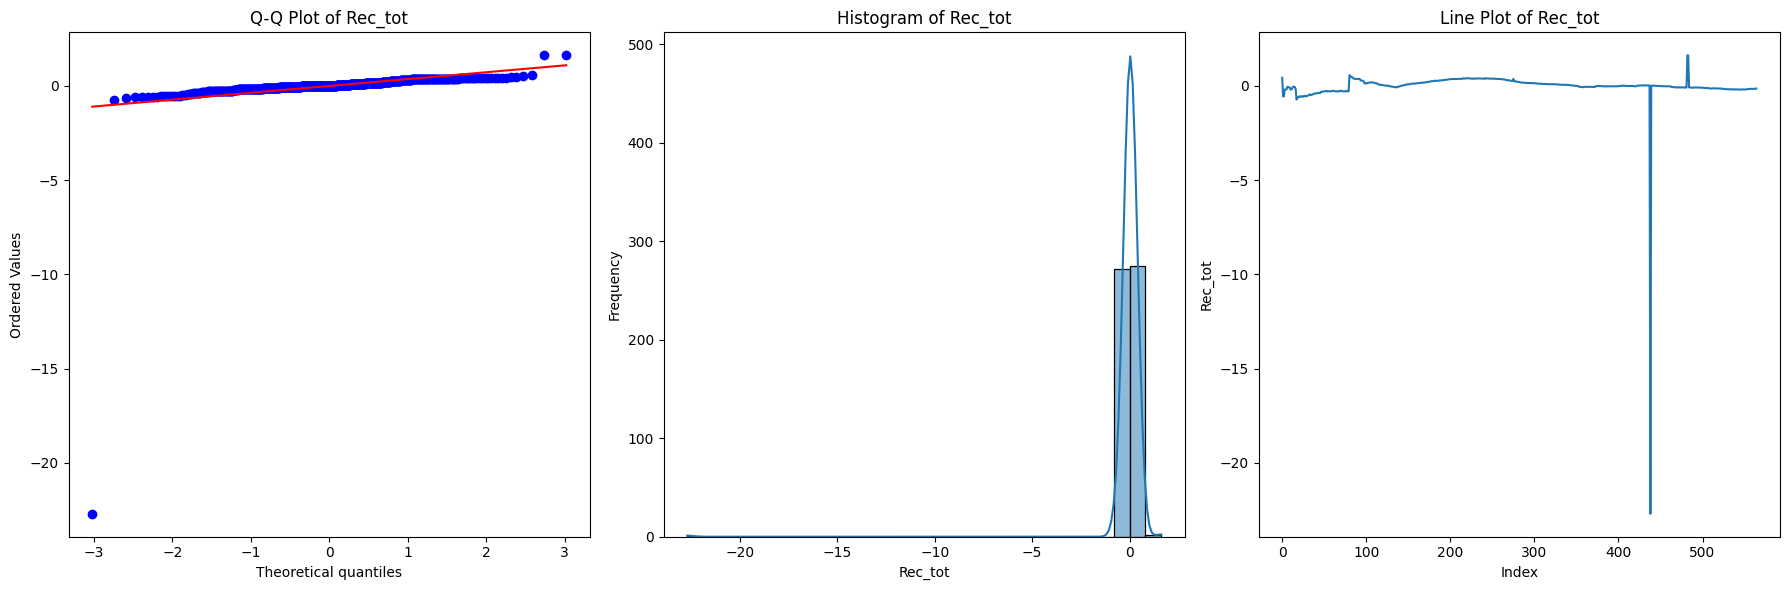

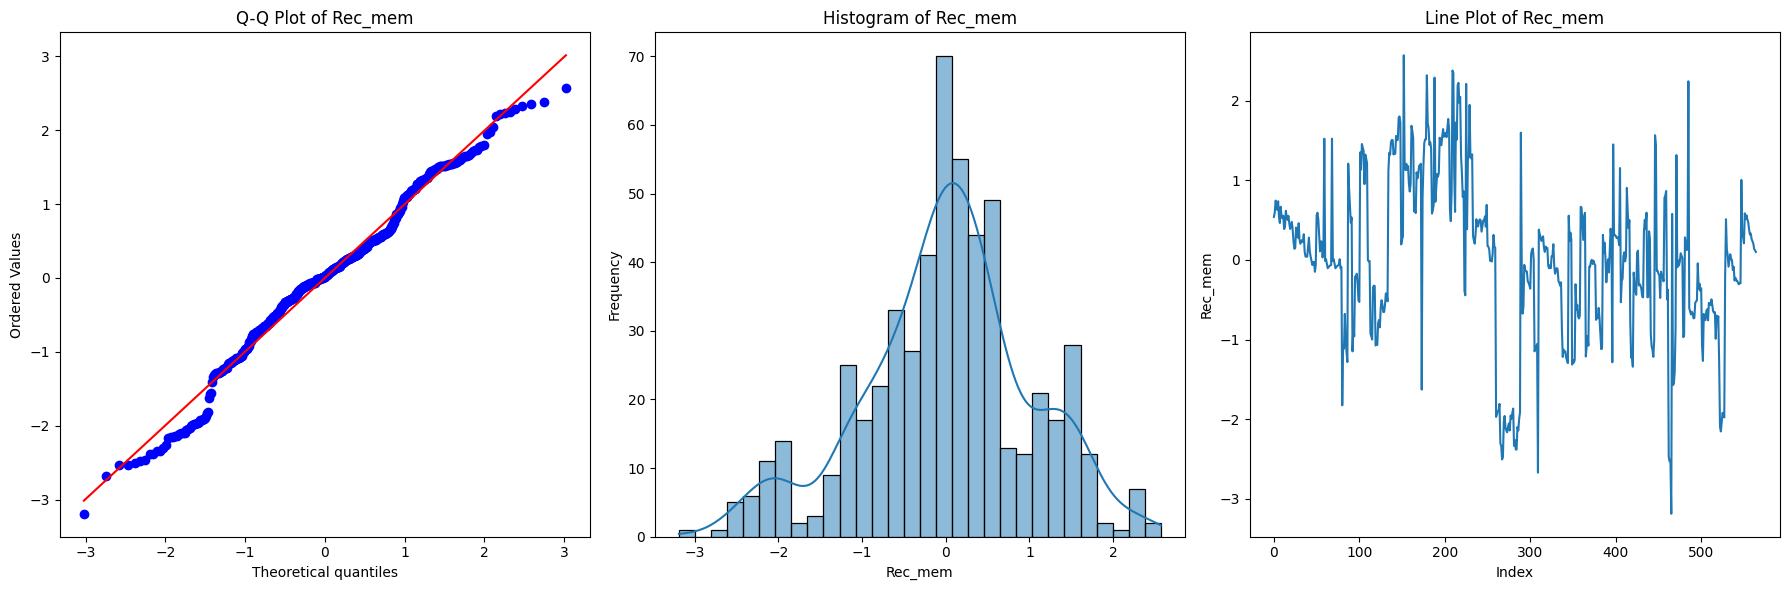

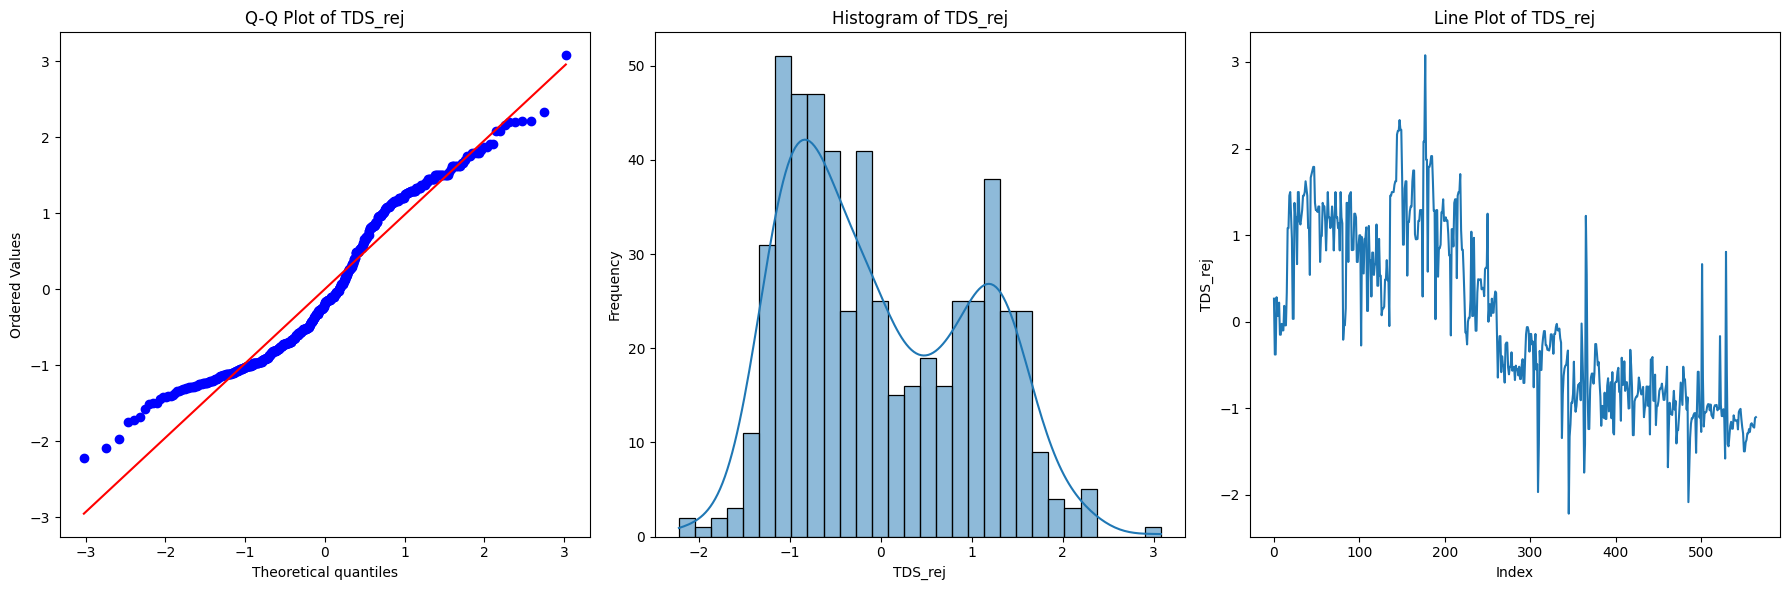

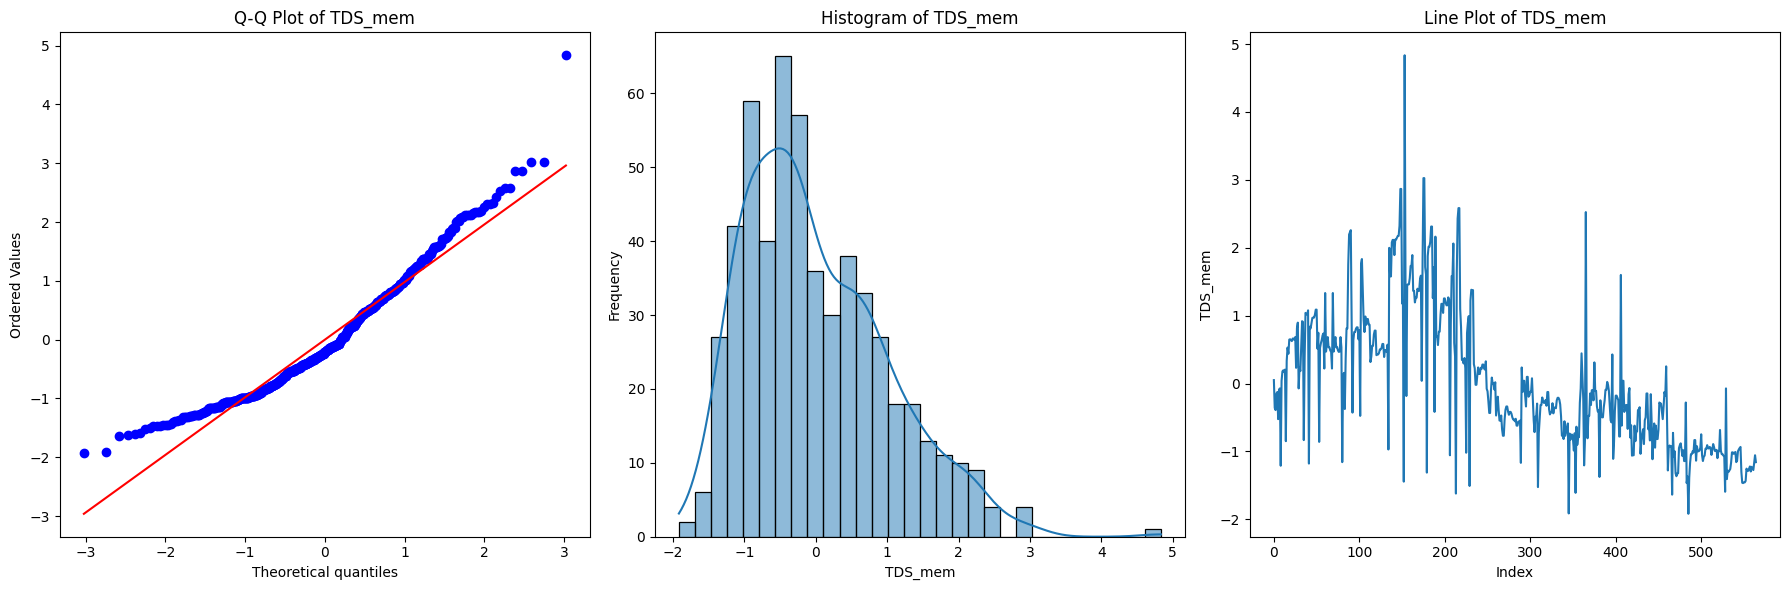

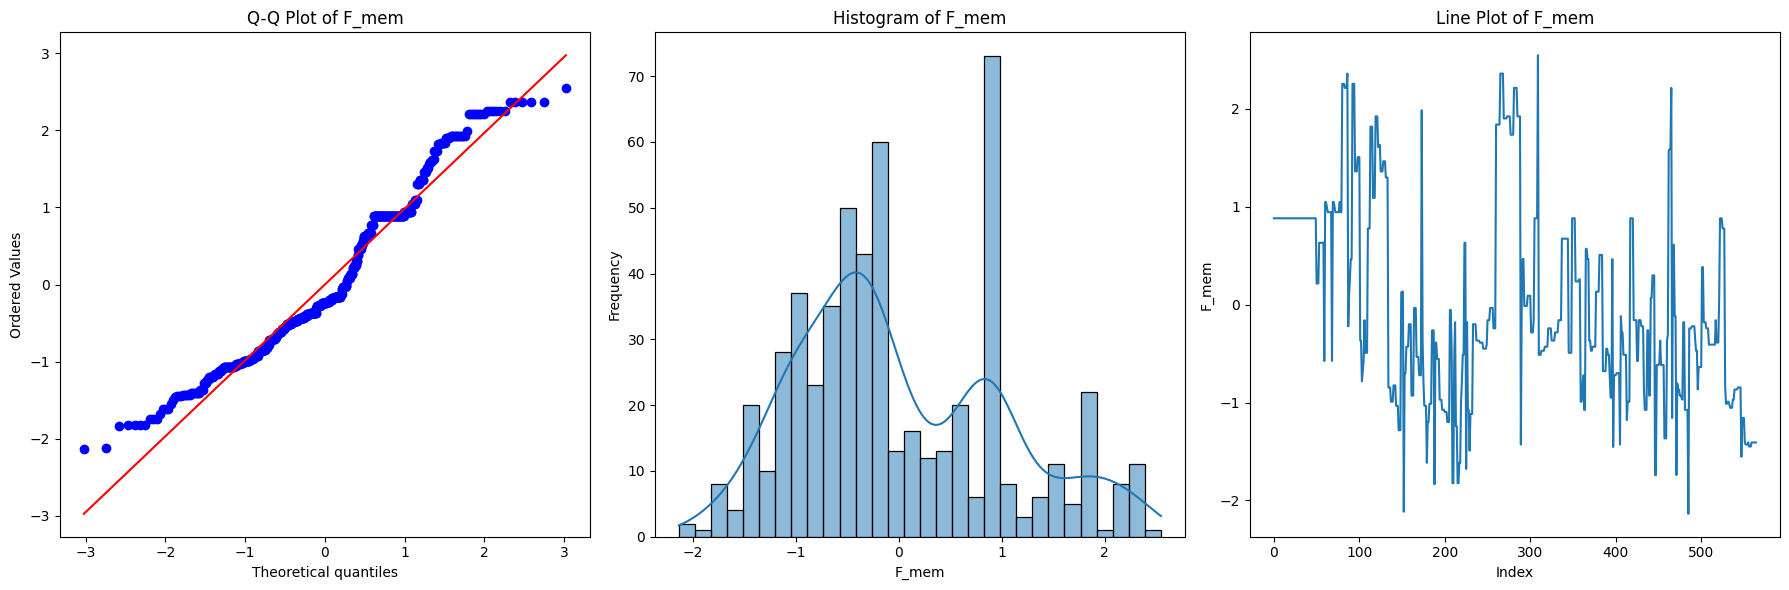

In [23]:
# Select numerical columns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
numeric_cols = anuj_df.select_dtypes(include=[np.number]).columns

# Plot Q-Q plot and Histogram for each numerical column
for col in numeric_cols:
    plt.figure(figsize=(18, 6))

    # Q-Q Plot
    plt.subplot(1, 3, 1)
    stats.probplot(anuj_df[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col}')

    # Histogram Plot
    plt.subplot(1, 3, 2)
    sns.histplot(anuj_df[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")

    #Line Plot
    plt.subplot(1, 3, 3)
    sns.lineplot(x=anuj_df.index, y=anuj_df[col])
    plt.title(f'Line Plot of {col}')
    plt.xlabel("Index")
    plt.ylabel(col)

    # Show plots
    plt.tight_layout()
    plt.show()

In [31]:
pca = PCA(n_components=10)
pca_result = pca.fit_transform(anuj_df)

In [32]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Singular Values:", pca.singular_values_)

Explained Variance Ratio: [5.64558447e-01 1.95785998e-01 1.08456047e-01 6.60557262e-02
 4.44326503e-02 1.60155236e-02 3.86524264e-03 4.10978804e-04
 3.61914619e-04 5.74713182e-05]
Singular Values: [55.72316807 32.8149812  24.42351853 19.06060058 15.63264458  9.38538118
  4.61073037  1.50345716  1.41086158  0.56222082]


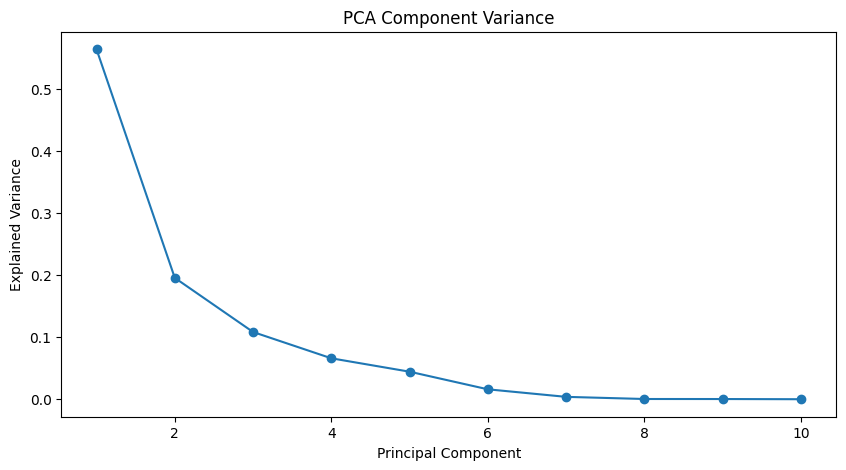

In [33]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('PCA Component Variance')
plt.show()

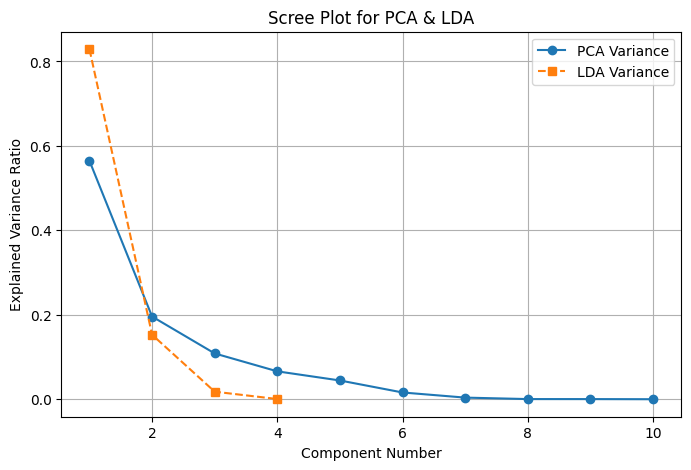

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
labels = anuj_df['TDS_mem'].values  # Replace with actual target column name
X_scaled = anuj_df.drop(columns=['TDS_mem'])  # Drop target column for LDA

# Convert continuous labels into discrete bins
n_classes = 5   
discretizer = KBinsDiscretizer(n_bins=n_classes, encode='ordinal', strategy='uniform')
labels_discrete = discretizer.fit_transform(labels.reshape(-1, 1)).astype(int).ravel()

# Perform LDA
n_features = X_scaled.shape[1]
n_classes = len(np.unique(labels_discrete))
max_components = min(n_features, n_classes - 1)

lda = LDA(n_components=max_components)  # Adjust components dynamically
lda.fit(X_scaled, labels_discrete)
lda_variance = lda.explained_variance_ratio_

# Plot Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), pca.explained_variance_ratio_, marker='o', label='PCA Variance')
plt.plot(range(1, len(lda_variance) + 1), lda_variance, marker='s', label='LDA Variance', linestyle='dashed')

plt.xlabel('Component Number')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot for PCA & LDA')
plt.legend()
plt.grid()
plt.show()

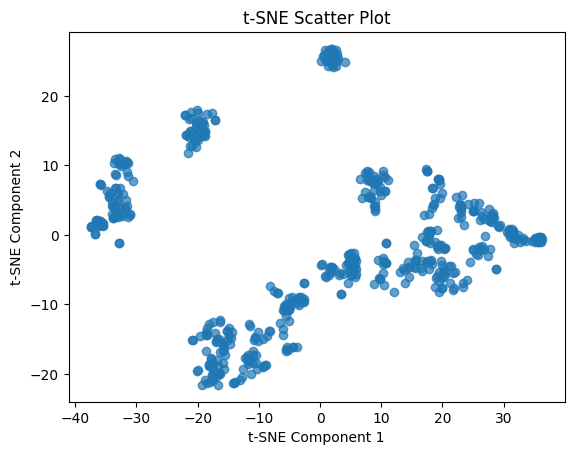

In [37]:
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(anuj_df)

plt.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.7)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Scatter Plot")
plt.show()

# **SECTION 5: (Show scatter matrices for PCA Loadings and same for LDA)**

In this section, we will conduct the following analyses:

1. Reframe the dataset to represent PCA components, which will be referred to as PCA Loadings (Eigenvectors).
2. Create a heatmap for the reframed dataset.
3. Plot scatter matrices for all the PCA components.

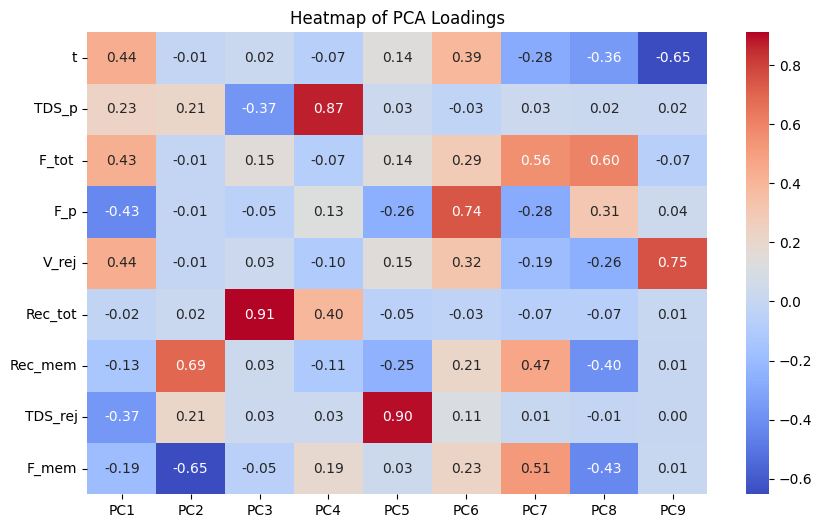

<Figure size 1200x1200 with 0 Axes>

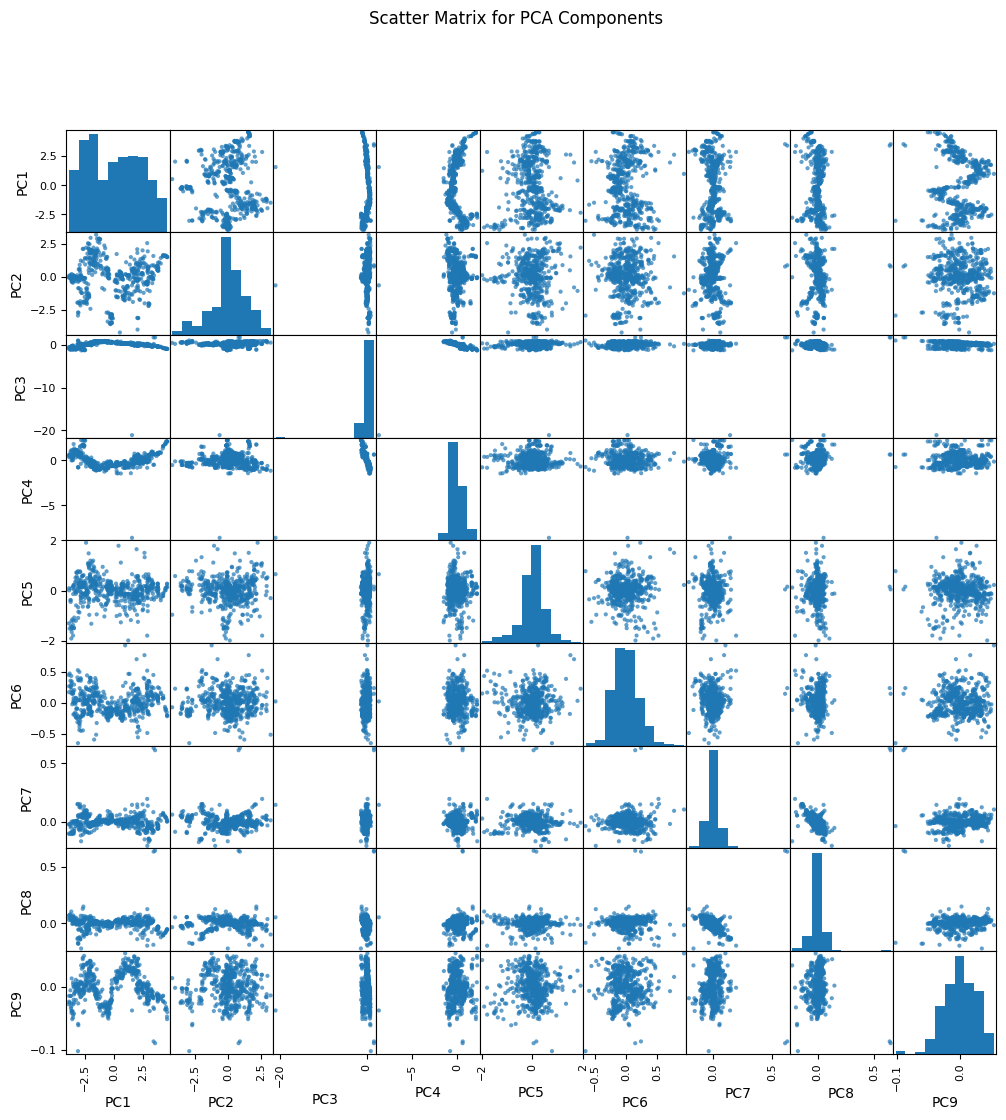

<Figure size 1200x1200 with 0 Axes>

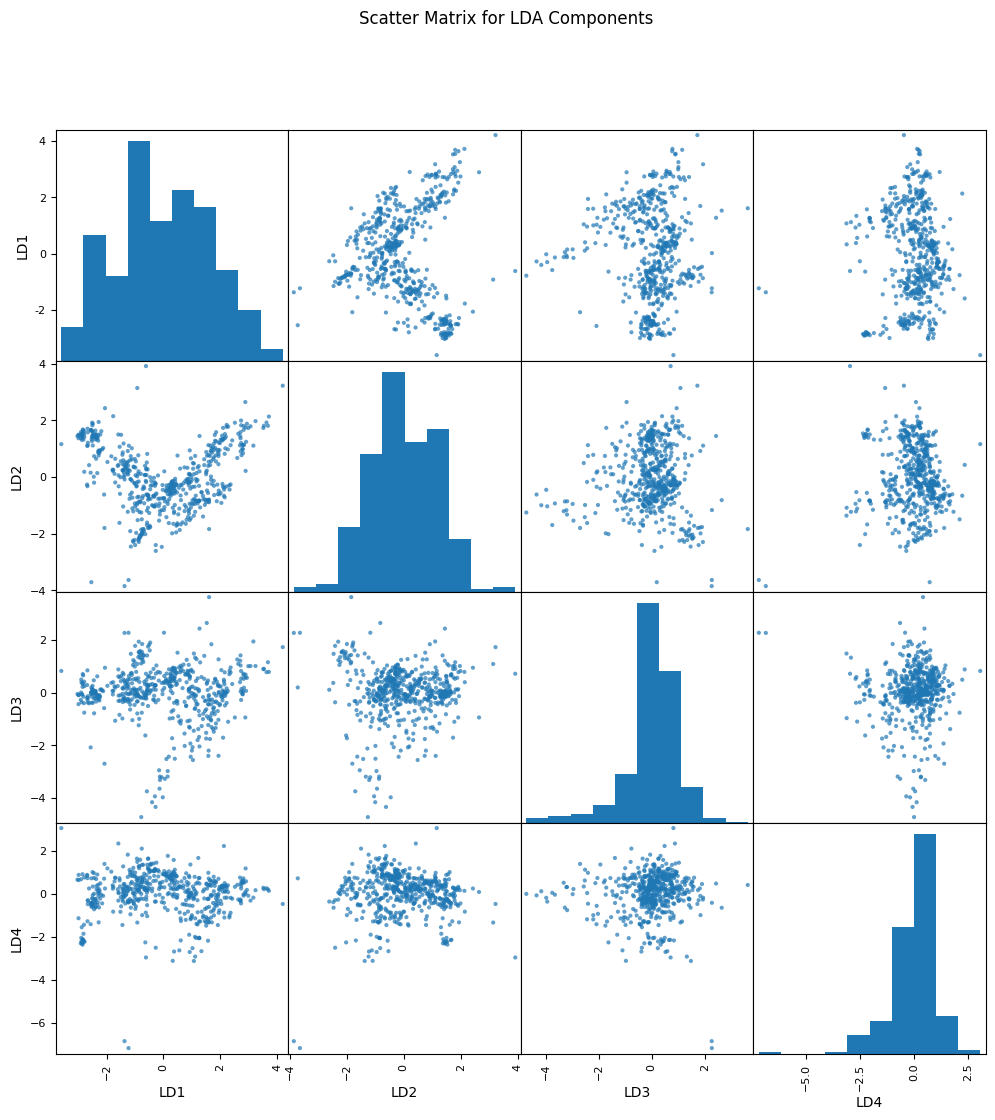

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler
from pandas.plotting import scatter_matrix

# Standardize Data
X_scaled = StandardScaler().fit_transform(anuj_df.drop(columns=['TDS_mem']))
labels = anuj_df['TDS_mem'].values

# PCA
n_components_pca = min(X_scaled.shape[1], 10)
pca = PCA(n_components=n_components_pca)
pca_components = pca.fit_transform(X_scaled)

# Reframe dataset as PCA Loadings (Eigenvectors)
pca_loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(n_components_pca)], index=anuj_df.drop(columns=['TDS_mem']).columns)

# Heatmap of PCA Loadings
plt.figure(figsize=(10, 6))
sns.heatmap(pca_loadings, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Heatmap of PCA Loadings')
plt.show()

# Convert continuous labels into discrete bins
n_classes = 5
discretizer = KBinsDiscretizer(n_bins=n_classes, encode='ordinal', strategy='uniform')
labels_discrete = discretizer.fit_transform(labels.reshape(-1, 1)).astype(int).ravel()

# LDA
n_features = X_scaled.shape[1]
n_classes = len(np.unique(labels_discrete))
max_components_lda = min(n_features, n_classes - 1)

lda = LDA(n_components=max_components_lda)
lda_components = lda.fit_transform(X_scaled, labels_discrete)

# Scatter Matrix for PCA Components
pca_df = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(n_components_pca)])
plt.figure(figsize=(12, 12))
scatter_matrix(pca_df, alpha=0.7, figsize=(12, 12), diagonal='hist')
plt.suptitle("Scatter Matrix for PCA Components")
plt.show()

# Scatter Matrix for LDA Components
lda_df = pd.DataFrame(lda_components, columns=[f'LD{i+1}' for i in range(max_components_lda)])
plt.figure(figsize=(12, 12))
scatter_matrix(lda_df, alpha=0.7, figsize=(12, 12), diagonal='hist')
plt.suptitle("Scatter Matrix for LDA Components")
plt.show()

# SECTION 6: Write your observation about how PCA and LDA are graphically different

# Graphical Comparison of PCA and LDA on the Dataset  

From the scatter matrix and scree plots, we can observe fundamental differences in how *PCA* and *LDA* transform the dataset.  

## *Principal Component Analysis (PCA)*  
PCA is an *unsupervised technique* that projects data onto directions of *maximum variance. This is evident from the PCA scatter matrix, where multiple components (PC1, PC2, etc.) are used to retain as much variance as possible. The distribution of data points appears **dispersed, with no clear class separation*, as PCA does not account for class labels.  

Additionally, the *scree plot* shows that PCA spreads variance across *more components*, capturing a gradual reduction in variance.  

## *Linear Discriminant Analysis (LDA)*  
LDA, on the other hand, is a *supervised method* that aims to *maximize class separability. The LDA scatter matrix clearly shows **fewer components* (*LD1, LD2, etc.), which are designed to enhance the distinction between different classes. The plotted points appear **more structured, with visible **class-based clustering*, confirming that LDA reduces dimensionality while preserving inter-class differences.  

The *scree plot* further reinforces this, as the variance captured by the first few LDA components is significantly *higher* compared to later components. This emphasizes its focus on *discriminative power* rather than overall variance.  

## *Summary*  
- *PCA* is best suited for capturing variance in high-dimensional data *without considering class labels*.  
- *LDA* is optimized for classification tasks by *maximizing class separation* in lower-dimensional space.